In [132]:
#import the necessary python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import defaultdict
import seaborn as sns

In [133]:
#load the data
train_dataset = pd.read_csv("train.csv")

test_dataset = pd.read_csv("test.csv")

In [134]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
#pre-process the data so that it can be trained

In [136]:
#figure out which columns are empty in the train dataset
print(train_dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [137]:
#drop the empty values in embark
train_dataset = train_dataset.dropna(subset=["Embarked"])

In [138]:
#for the age column, we can fill in the missing values with the average
avg_age = train_dataset.loc[:, 'Age'].mean()
train_dataset['Age'] = train_dataset['Age'].fillna(value=avg_age)

In [139]:
#label encode Sex and Embarked
encoder = defaultdict(preprocessing.LabelEncoder)
train_dataset['Sex'] = encoder['Sex'].fit_transform(train_dataset['Sex'])
train_dataset['Embarked'] = encoder['Embarked'].fit_transform(train_dataset['Embarked'])

In [140]:
#the train dataset should be done with pre-processing
print(train_dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


In [141]:
#figure out which columns in the test dataset need to be pre-processed
print(test_dataset.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [142]:
#fill in the na values of Age and Fare with the average
avg_age = test_dataset.loc[:, 'Age'].mean()
test_dataset['Age'] = test_dataset['Age'].fillna(value=avg_age)
avg_fare = test_dataset.loc[:, 'Fare'].mean()
test_dataset['Fare'] = test_dataset['Fare'].fillna(value=avg_fare)

In [143]:
#label encode Sex and Embarked columns
test_dataset['Sex'] = encoder['Sex'].fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = encoder['Embarked'].fit_transform(test_dataset['Embarked'])

In [144]:
#test dataset should be good to go
print(test_dataset.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


In [145]:
#split the dataset into the appropriate splits
x_train = train_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = train_dataset['Survived']
x_test = test_dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

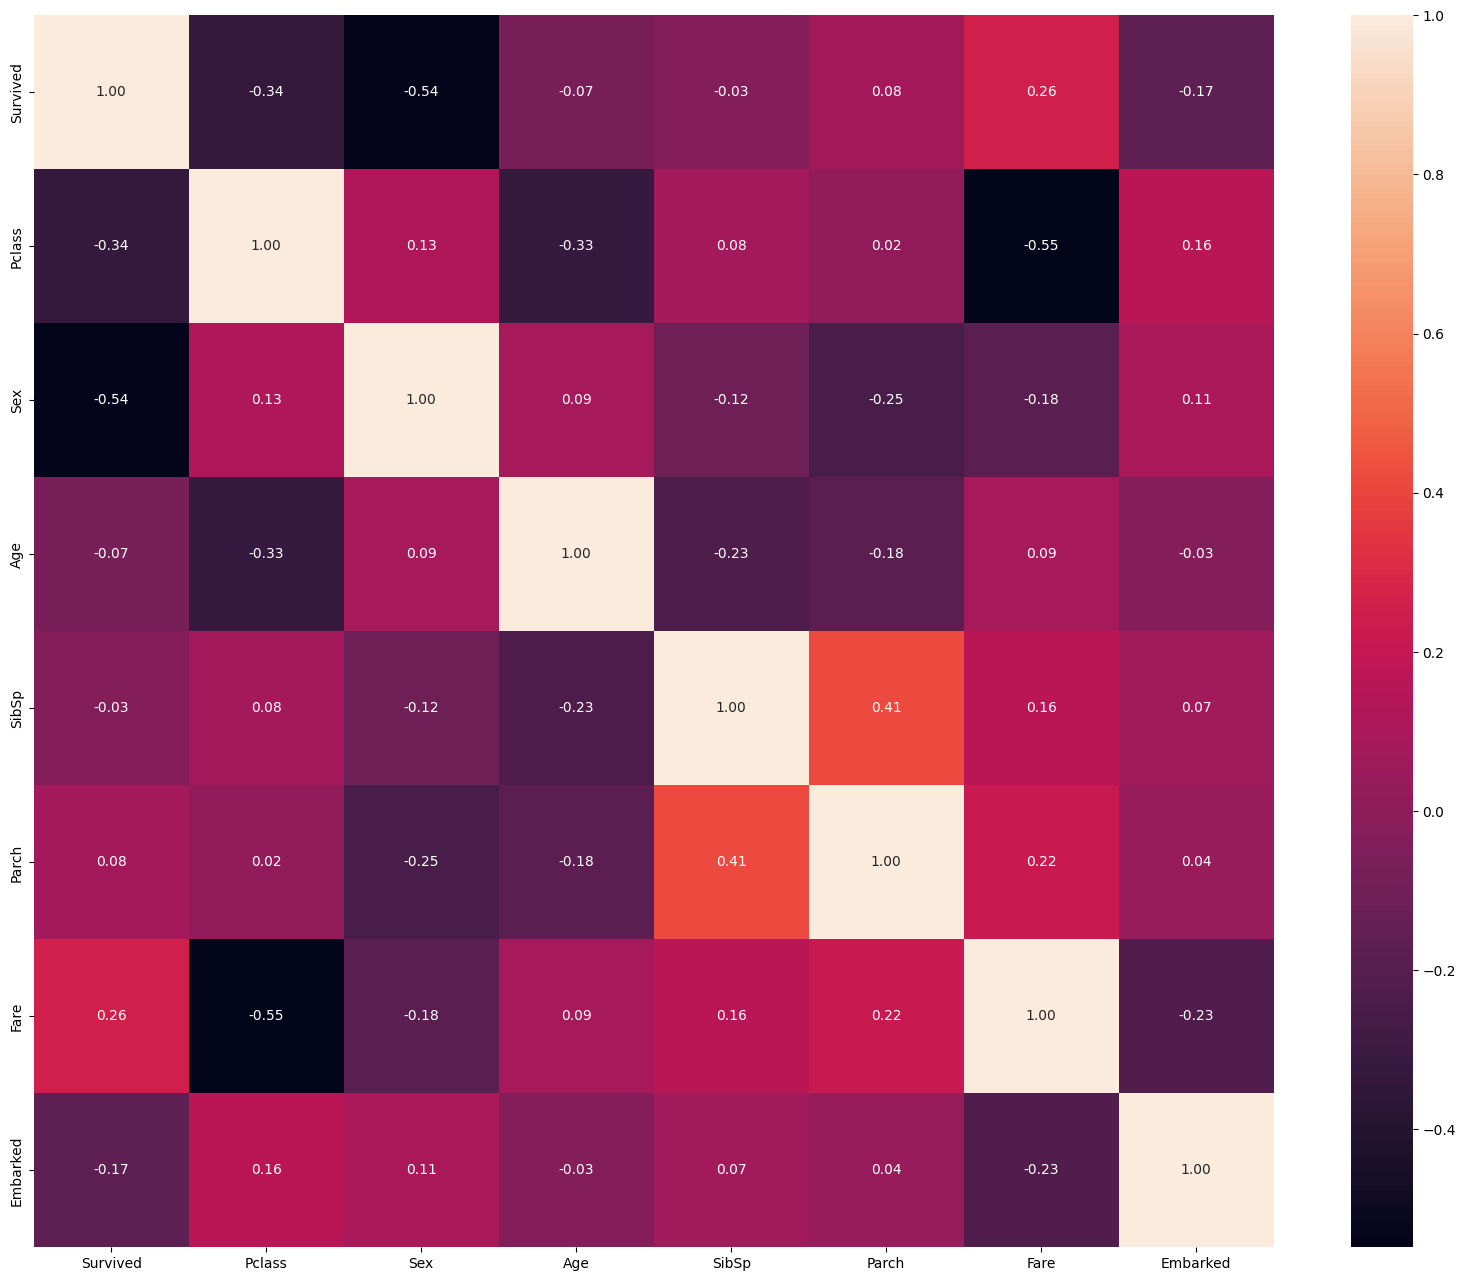

In [146]:
#Get the correlation matrix for the train_dataset
corr_matrix = x_train.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={'size':10})
plt.show()

In [147]:
#Trim the variables that are less than 0.1 on the correlation matrix
x_train = x_train.drop(['Survived', 'Age', 'SibSp', 'Parch'], axis=1)
x_test = x_test.drop(['Age', 'SibSp', 'Parch'], axis=1)

In [148]:
#build the model
rfc_model = RandomForestClassifier(n_estimators=2000, random_state=0)

In [149]:
#train the model
rfc_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=0)

In [150]:
predictions = rfc_model.predict(x_test)

In [151]:
print(predictions[:5])

[0 1 0 0 1]


In [153]:
print(type(test_dataset['PassengerId']))

<class 'pandas.core.series.Series'>


In [152]:
file_name = "titanic_predictions_rfc.csv"
fields = ['PassengerId', 'Survived']
passengerid_list = test_dataset['PassengerId']
with open(file_name, "w", newline='') as csvfile:
    csvwriter = csv.DictWriter(csvfile, fieldnames=fields)
    csvwriter.writeheader()
    for i in range(len(x_test)):
        csvwriter.writerow({'PassengerId': passengerid_list[i], 'Survived': predictions[i]})